#                               期末報告
## 姓名:朱顯誠  
## 學號:106022535

## 1. 
### 假設一位MLB的選手在練習投蝴蝶球，在本壘放置一個大型九宮格板子，一開始的練習區是無風的狀況，所以蝴蝶球在飛行的過程往左或往右的機率是一樣的，但是求在往上飄的機率會略少於下將的機率，所以這位投手丟50、100、1000、50000次進好球帶的分布?

In [209]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from scipy.stats import norm

def displacement_x(p):
    return 1 if 0 <= p < 0.5 else -1
def displacement_y(p):
    return 1 if 0 <= p < 0.49 else -1

def baseball(balls, dist):
    possx = []
    possy = []
    for i in range(balls):
        psx = sum([displacement_x(np.random.random()) for j in range(dist)])
        psy = sum([displacement_y(np.random.random()) for k in range(dist)])
    #     posx = sum(psx)
    #     posy = sum(psy)
        possx.append(psx)
        possy.append(psy)
    
    fig, ax = plt.subplots()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.hist2d(possx, possy, bins=25 , normed=1, cmap=plt.cm.Greys);
    plt.colorbar()
    plt.xlim(-80,80)
    plt.ylim(-80,80)
    ax.set_yticks([-30, 30])
    ax.set_xticks([-30, 30])
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    plt.show() 

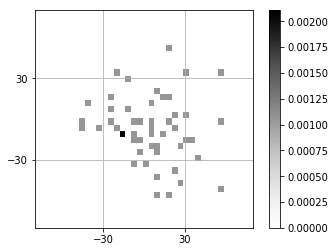

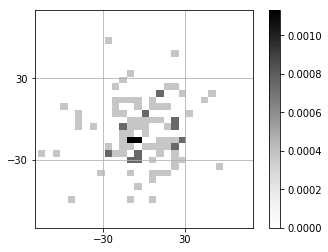

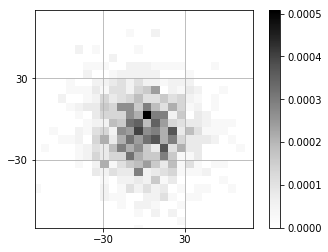

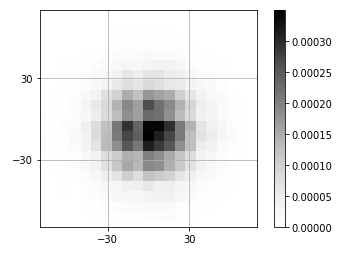

In [210]:
baseball(50, 500)
baseball(100, 500)
baseball(1000, 500)
baseball(50000, 500)

### 丟得越多次，可以明顯地看到分布在中心

### X剖面的機率分布圖

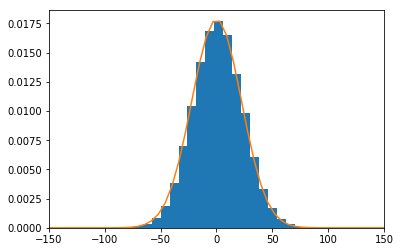

In [216]:
possx = []
possy = []
for i in range(50000):
    psx = sum([displacement_x(np.random.random()) for j in range(500)])
    psy = sum([displacement_y(np.random.random()) for k in range(500)])
#     posx = sum(psx)
#     posy = sum(psy)
    possx.append(psx)
    possy.append(psy)

plt.hist(possx, bins=22, density=1);
params  = norm.fit(possx)
x = np.linspace(-150, 150)
plt.xlim(-150, 150)
plt.plot(x, norm.pdf(x, *params))

### Y剖面的機率分布圖

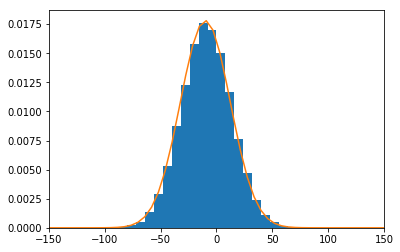

In [217]:
plt.hist(possy, bins=22, density=1);
params  = norm.fit(possy)
x = np.linspace(-150, 150)
plt.xlim(-150, 150)
plt.plot(x, norm.pdf(x, *params))

### Answer:在理想的情況下，可以由第一張的分布圖看到幾乎都是在好球區(中心區)，我們也可以藉由X和Y的剖面圖，越靠中心點(X=0,Y=0)的機率越高

### 2.改變距離的影響

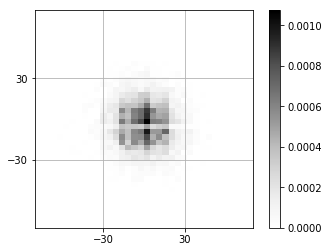

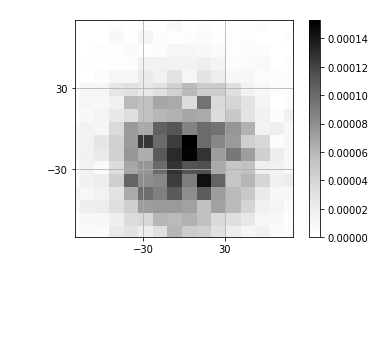

In [218]:
baseball(5000, 200)
baseball(5000, 1200)

### 距離越遠，分布的越散

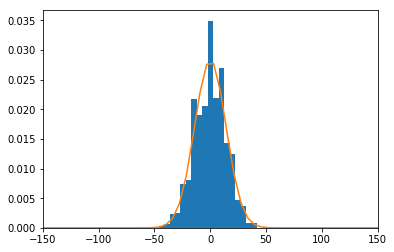

In [219]:
possx = []
possy = []
for i in range(5000):
    psx = sum([displacement_x(np.random.random()) for j in range(200)])
    psy = sum([displacement_y(np.random.random()) for k in range(200)])
#     posx = sum(psx)
#     posy = sum(psy)
    possx.append(psx)
    possy.append(psy)

plt.hist(possx, bins=22, density=1);
params  = norm.fit(possx)
x = np.linspace(-150, 150)
plt.xlim(-150, 150)
plt.plot(x, norm.pdf(x, *params))

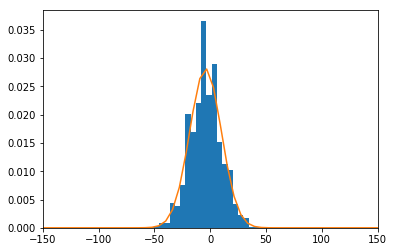

In [220]:
plt.hist(possy, bins=22, density=1);
params  = norm.fit(possy)
x = np.linspace(-150, 150)
plt.xlim(-150, 150)
plt.plot(x, norm.pdf(x, *params))

## 3. 假設現在左側有風，讓往右的機率變成60%，而往下降的機率變成55%

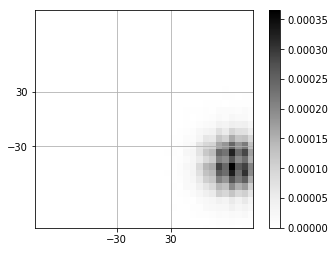

In [225]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from scipy.stats import norm

def displacement_x(p):
    return 1 if 0 <= p < 0.60 else -1 #決定左右的機率
def displacement_y(p):
    return 1 if 0 <= p < 0.45 else -1 #決定上下的機率
possx = []
possy = []
for i in range(50000): #丟球次數
    psx = sum([displacement_x(np.random.random()) for j in range(500)]) #投手到九宮格距離
    psy = sum([displacement_y(np.random.random()) for k in range(500)]) #投手到九宮格距離
#     posx = sum(psx)
#     posy = sum(psy)
    possx.append(psx)
    possy.append(psy)
    
fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')
plt.hist2d(possx, possy, bins=25 , normed=1, cmap=plt.cm.Greys);
plt.colorbar()
plt.xlim(-120,120)
plt.ylim(-120,120)
ax.set_yticks([-30, 30])
ax.set_xticks([-30, 30])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()    

### X剖面的機率分布圖

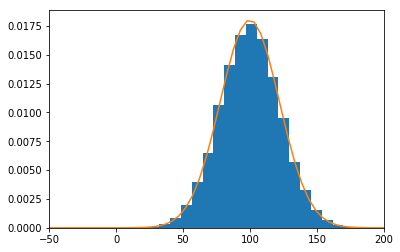

In [228]:
plt.hist(possx, bins=22, density=1);
params  = norm.fit(possx)
x = np.linspace(-50, 200)
plt.xlim(-50, 200)
plt.plot(x, norm.pdf(x, *params))

### Y剖面的機率分布圖

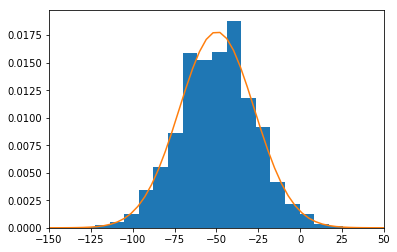

In [230]:
plt.hist(possy, bins=22, density=1);
params  = norm.fit(possy)
x = np.linspace(-150, 50)
plt.xlim(-150, 50)
plt.plot(x, norm.pdf(x, *params))

### Answer:在有外力的影響下，影響了左右的機率和下降的機率，造成分布往右下移動，X剖面的機率分布往右，Y剖面的機率分布往下。

### 由此我們可以得知，會受到風速的大小影響，丟到好球區的機率大大的下降；想要增加好球的機率必須做出相對應的位置丟去，才有辦法在受外力狀況下，也能丟到好球區。